# Project Title
#### Sam McKinven
## Table of Contents
1. [Background](#background)
2. [Goal](#goal)
3. [Source Data](#source-data)
4. [Initial Review of the Data](#Initial-Review-of-the-Data)
5. [Data Wrangling (if necessary)](#Data-Wrangling)
6. [Machine Learning Methodologies (Only if you are using a structured dataset)](#Machine-Learning-Methodologies)
7. [Deep Learning Methodologies](#Deep-Learning-Methodologies)
8. [Overall Conclusions and Recommendations](#Overall-Conclusions-and-Recommendations)

## Background <a id="background"></a>

Patient length of stay (LOS) is one critical parameter to observe and predict to improve the efficiency of the healthcare management in a hospital.
This parameter helps hospitals to identify patients of high LOS risk (patients who will stay longer) at the time of admission. Once identified, patients with high LOS risk can have their treatment plan optimized to miminize LOS and lower the chance of staff/visitor infection. Also, prior knowledge of LOS can aid in logistics such as room and bed allocation planning.

My aim is to accurately predict the LOS for each patient on case by case basis so that the hospitals can use this information for optimal resource allocation and better functioning. The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days.

## Goal <a id="goal"></a>

My aim is to accurately predict the LOS for each patient on case by case basis so that the hospitals can use this information for optimal resource allocation and better functioning.

## Source Data <a id="source-data"></a>
Data Description


*   train_data.csv – File containing features related to patient, hospital and Length of stay on case basis
*   train_data_dictonary.csv – File containing the information of the features in train file
*   test_data.csv – File containing features related to patient, hospital. Need to predict the Length of stay for each case_id

Data Source captured from: https://www.kaggle.com/datasets/nehaprabhavalkar/av-healthcare-analytics-ii


More details can be found on Analytics Vidhya website who conducted the hackathon.
https://datahack.analyticsvidhya.com/contest/janatahack-healthcare-analytics-ii/#ProblemStatement


## Initial Review of the Data
First we will take a look at the data dictionary so we can get a general understanding of the column names and their descriptions.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import  EarlyStopping


dictionary = pd.read_csv('/content/train_data_dictionary.csv')
dictionary

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [21]:
train = pd.read_csv('/content/train_data.csv')
train = pd.DataFrame(train)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

It appears that we have some null values in 'Bed Grade' and 'City_Code_Patient'. We will have to clean these before analysis.

In [22]:
duplicates = train.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


## Data Wrangling

In [23]:
#Fill missing values with mode as they are the highest selected.
train['Bed Grade'].fillna(train['Bed Grade'].mode()[0], inplace=True)
train['City_Code_Patient'].fillna(train['City_Code_Patient'].mode()[0], inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318438 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3184

Other things to note are that 'Stay' and 'Age' are numerical but in buckets. This will likely require us to make this a functional format.

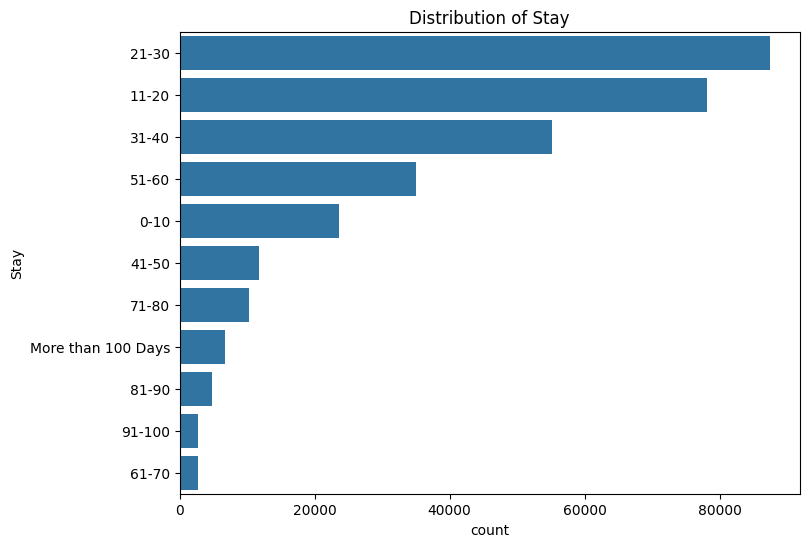

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(y=train['Stay'], order=train['Stay'].value_counts().index)
plt.title('Distribution of Stay')
plt.show()

columns_to_drop = ['case_id', 'patientid']
train = train.drop(columns=columns_to_drop)

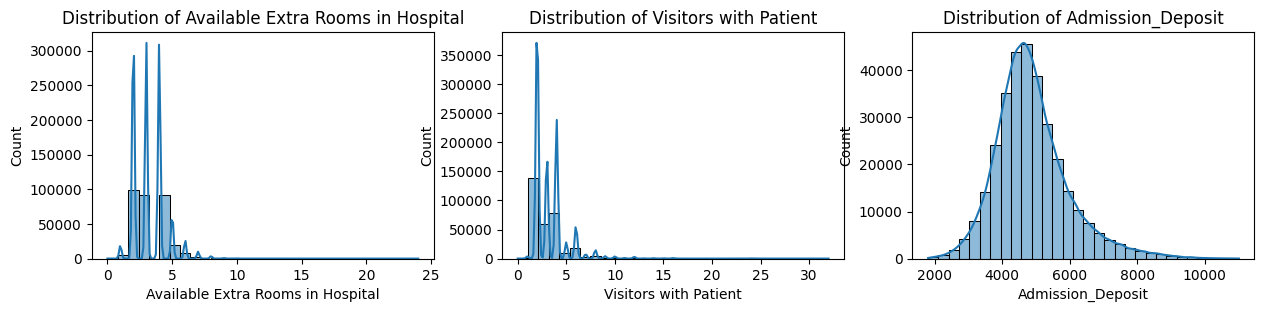

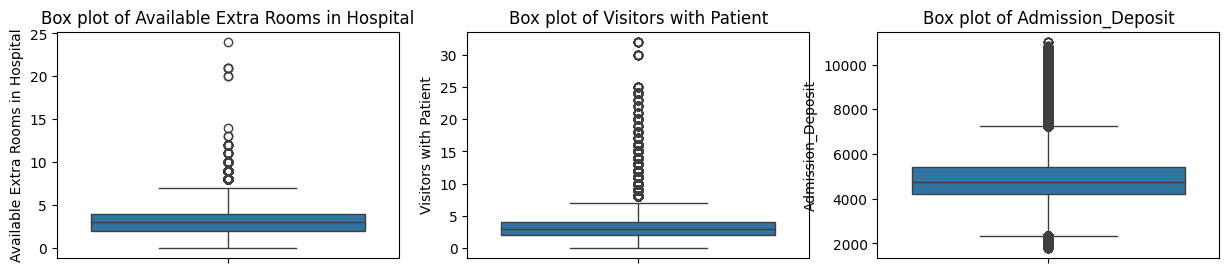

In [25]:

numerical_columns = ['Available Extra Rooms in Hospital','Visitors with Patient','Admission_Deposit']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(train[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
plt.show()

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=train[column])
    plt.title(f'Box plot of {column}')
plt.show()

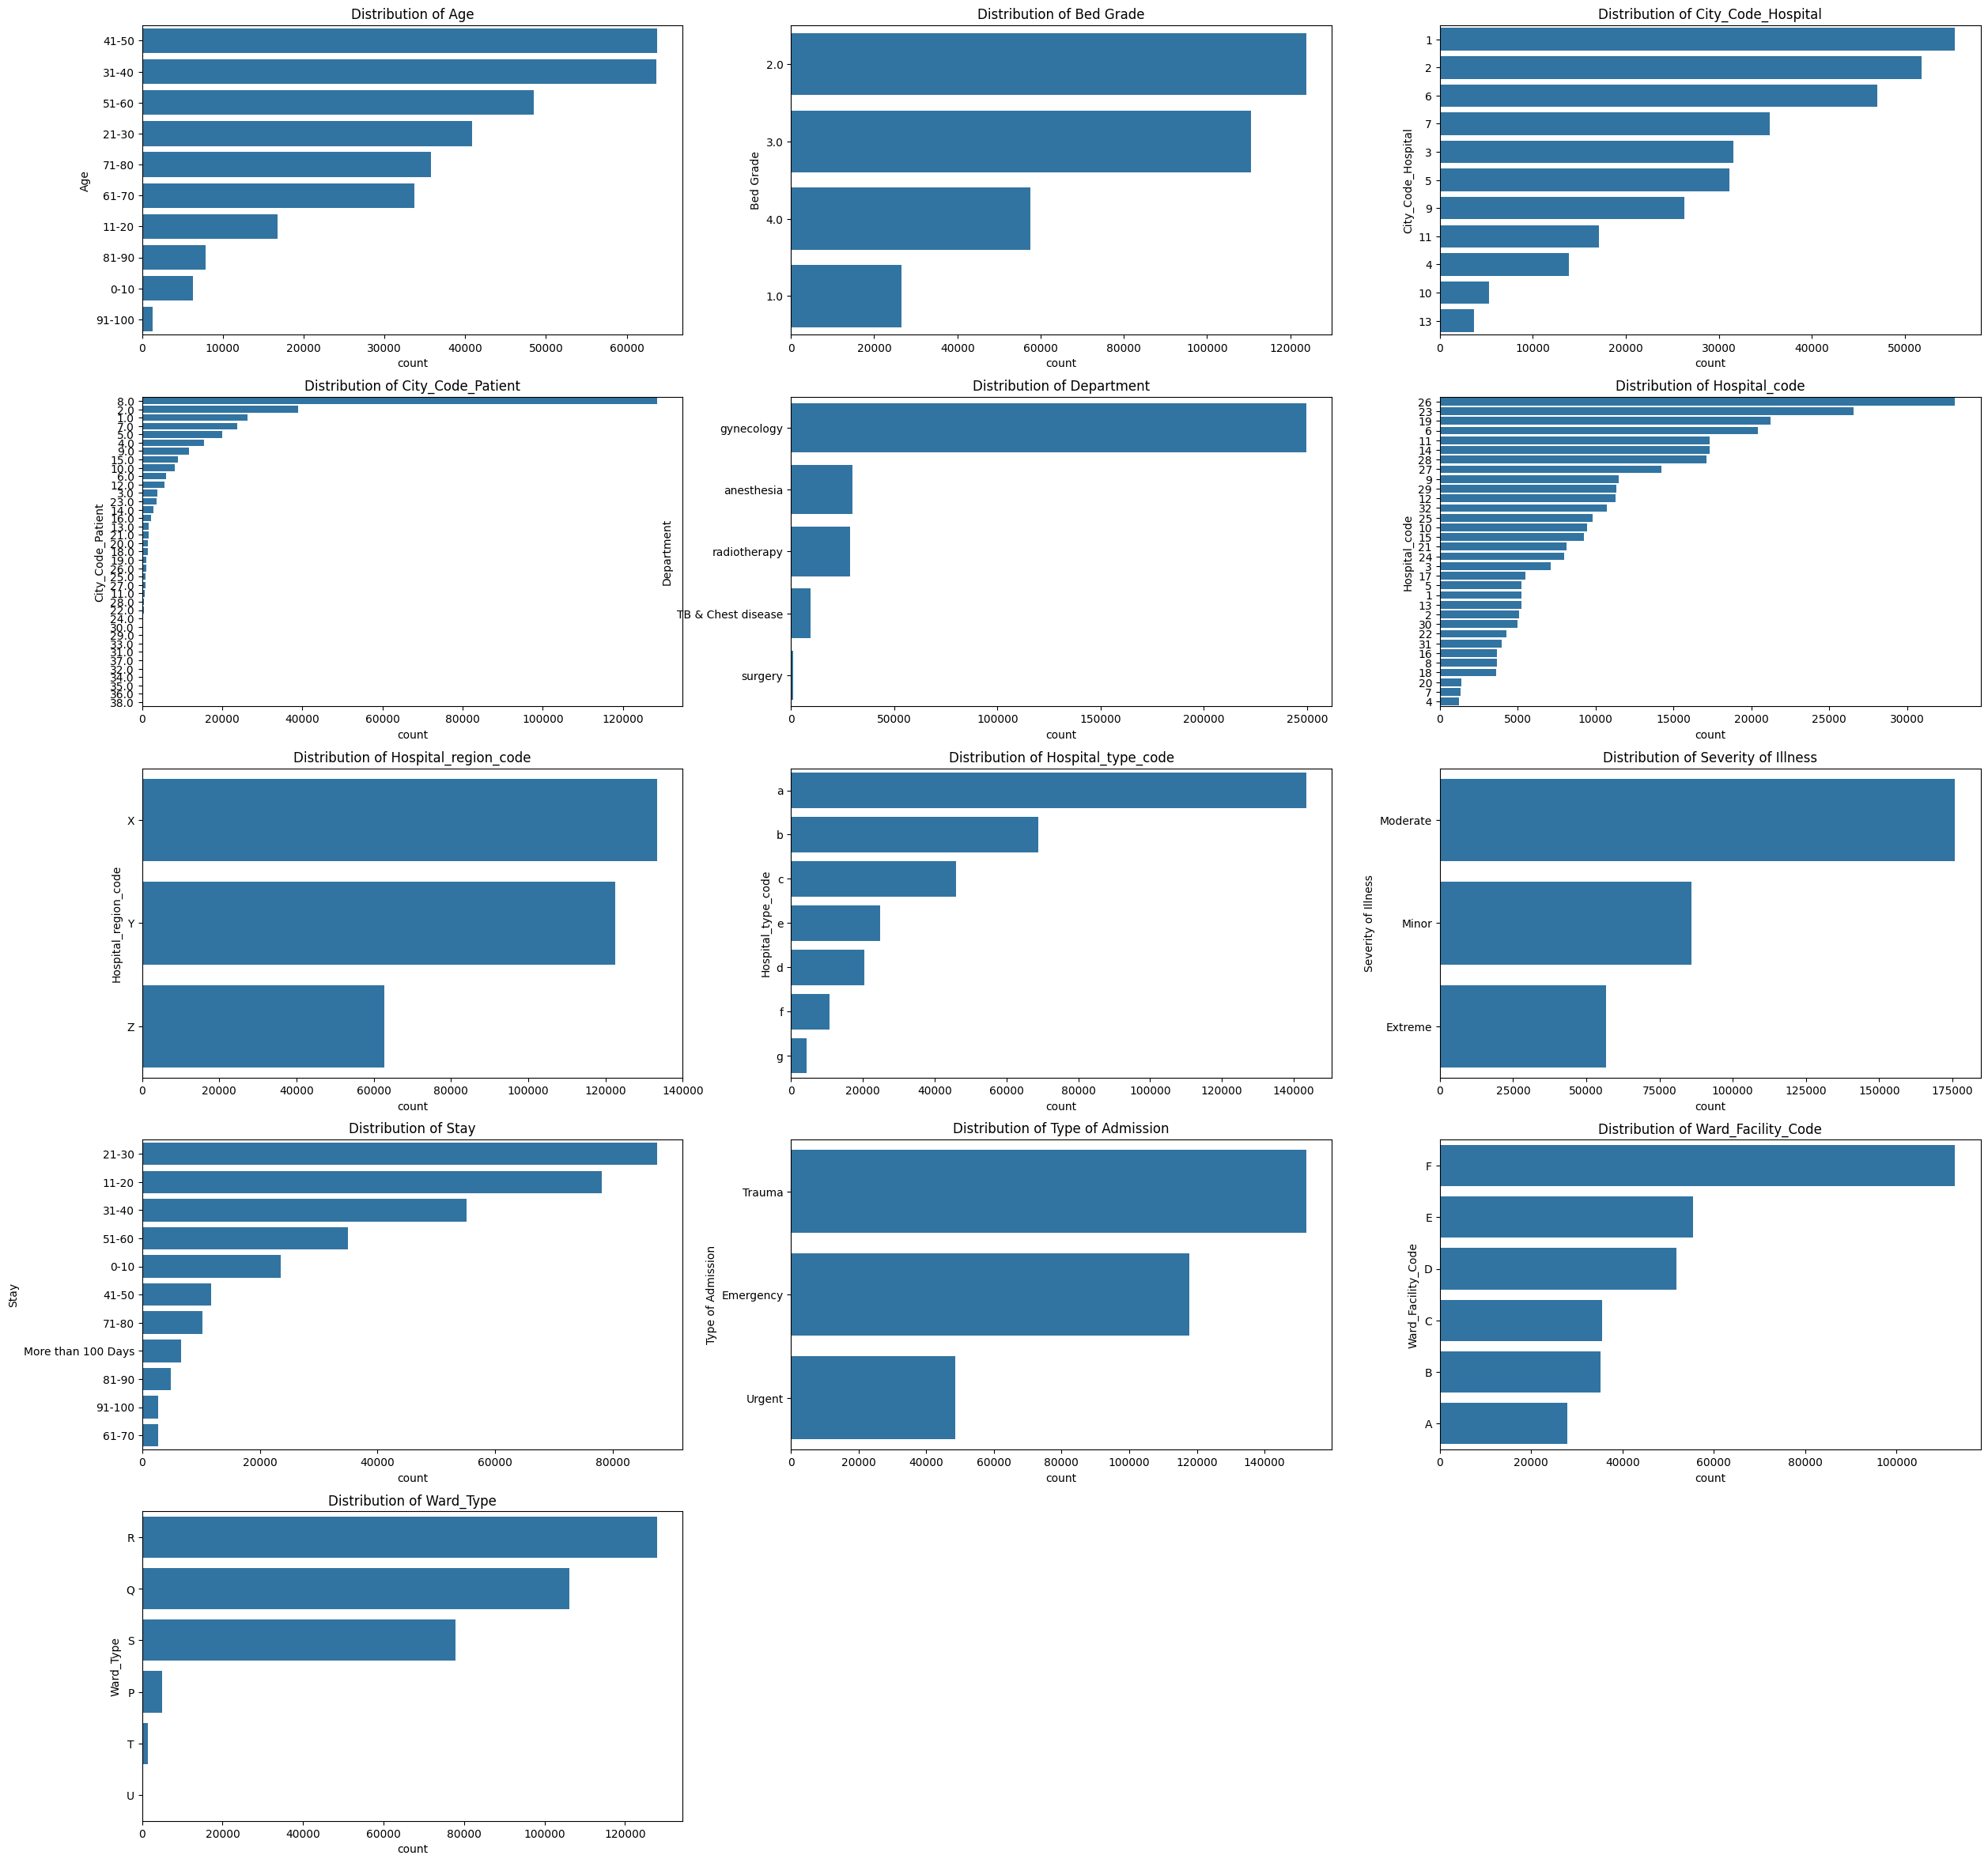

In [26]:
categorical_columns = train.columns.difference(numerical_columns).tolist()

plt.figure(figsize=(30, 60))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(10, 3, i)
    sns.countplot(y=train[column], order=train[column].value_counts().index)
    plt.title(f'Distribution of {column}')
plt.show()

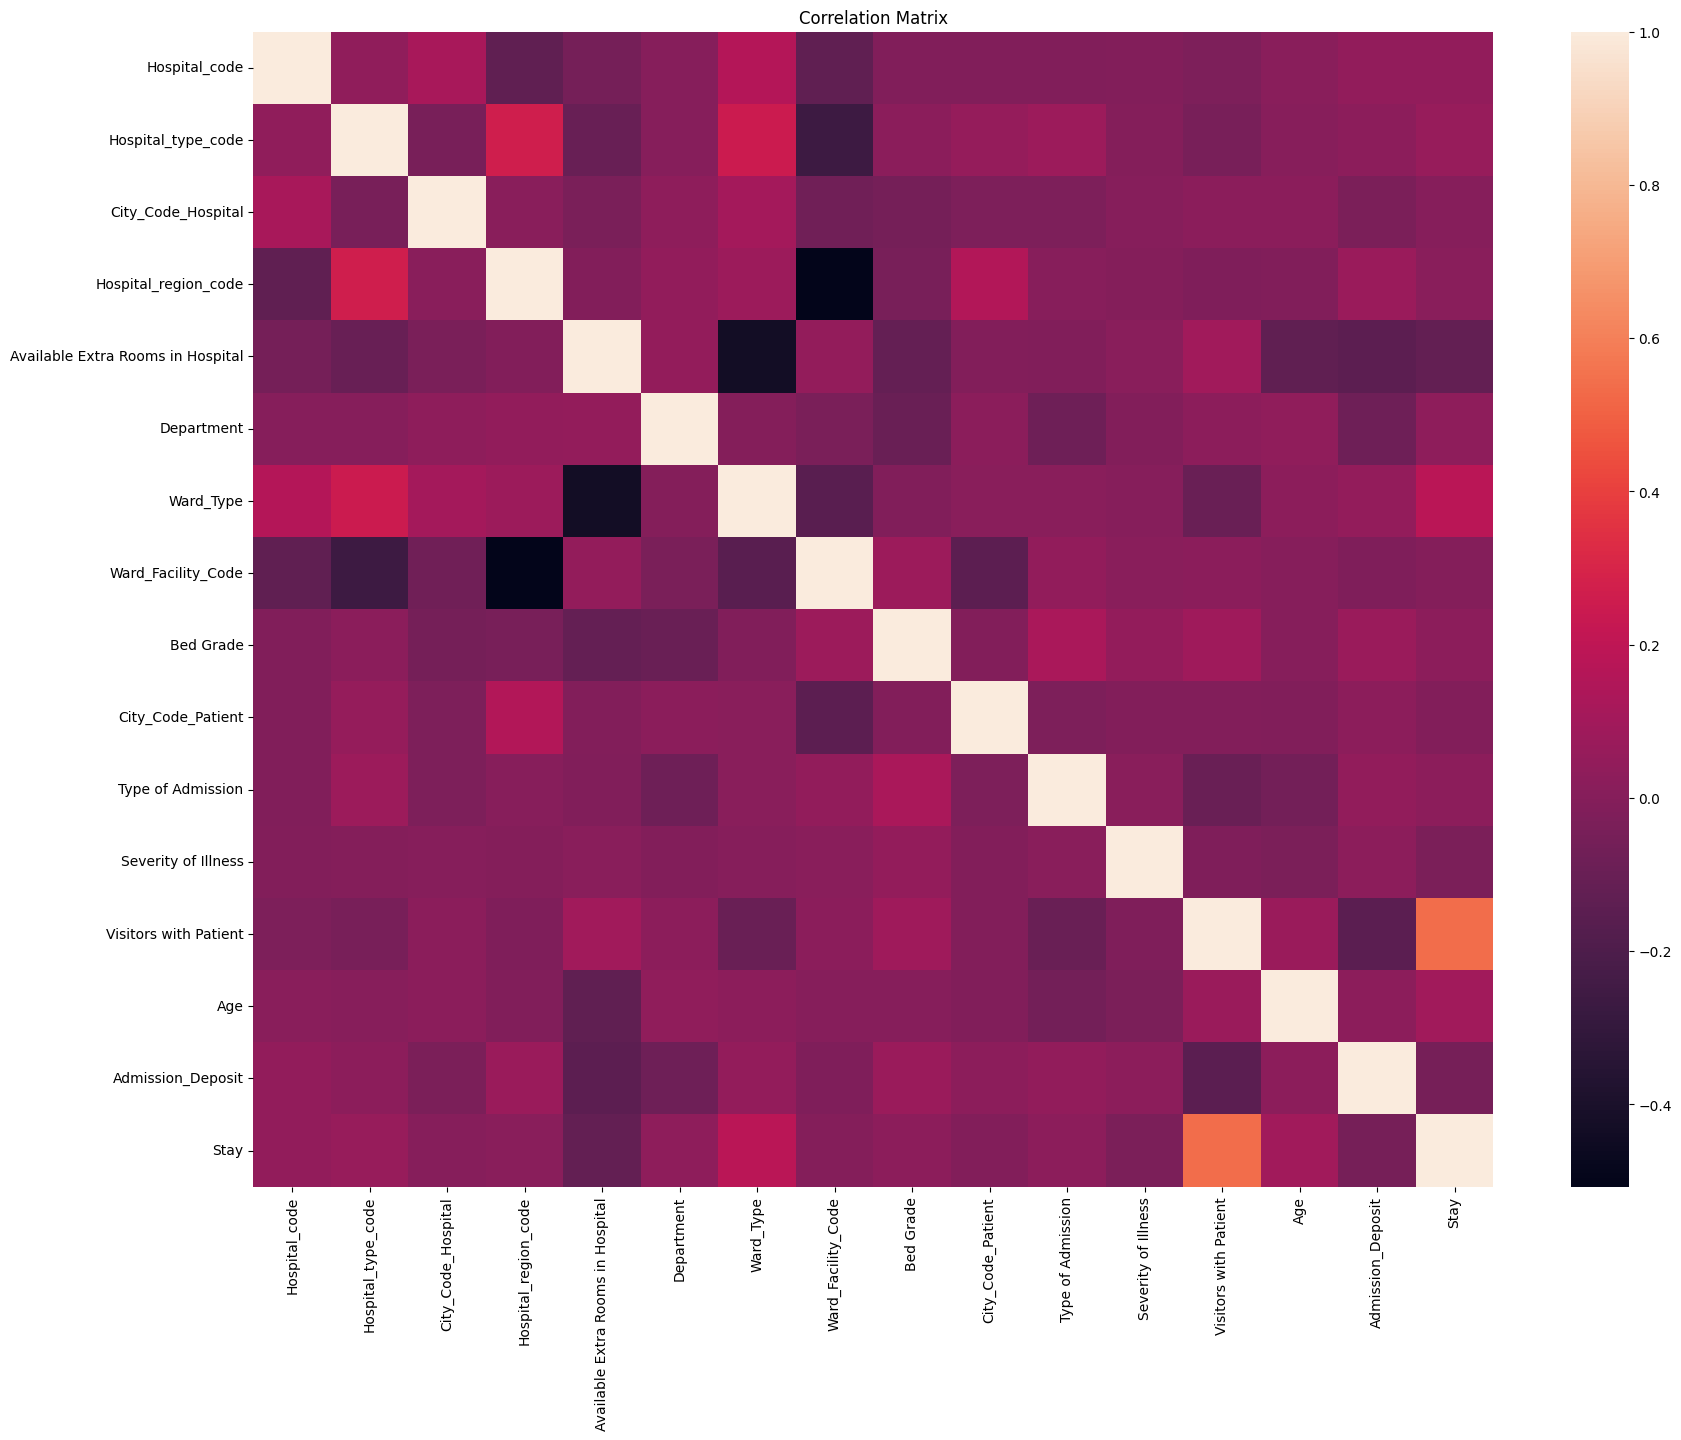

In [27]:

# Encode categorical variables
le = LabelEncoder()
for col in categorical_columns:
    train[col] = le.fit_transform(train[col])

# Separate target variable
y = train['Stay']
y = le.fit_transform(y)
y = to_categorical(y)

# Calculate correlation matrix
corr_matrix = train.corr().abs()
plt.figure(figsize=(20, 15))
sns.heatmap(train.corr(), annot=False)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

## Machine Learning Meathodologies

In [28]:

# Scale numerical columns
scaler = StandardScaler()
X = train.drop(columns='Stay')
for col in train[numerical_columns].columns:
    X[col] = scaler.fit_transform(X[[col]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_classes = y_train.shape[1]

In [29]:

# Define
knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier()

# Train
knn.fit(X_train, y_train)
tree.fit(X_train, y_train)

# Predict
knn_preds = knn.predict(X_test)
tree_preds = tree.predict(X_test)

# Evaluate
knn_accuracy = accuracy_score(y_test, knn_preds)
tree_accuracy = accuracy_score(y_test, tree_preds)

print(f"KNN Accuracy: {knn_accuracy}")
print(f"Decision Tree Accuracy: {tree_accuracy}")
print("Classification Report:\n", classification_report(y_test, knn_preds))

KNN Accuracy: 0.19386697651048862
Decision Tree Accuracy: 0.2959584223087552
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.04      0.07      4689
           1       0.41      0.25      0.31     15561
           2       0.42      0.31      0.35     17603
           3       0.32      0.11      0.17     10981
           4       0.09      0.00      0.01      2357
           5       0.40      0.16      0.23      7128
           6       0.00      0.00      0.00       554
           7       0.20      0.02      0.04      2031
           8       0.36      0.04      0.08       941
           9       0.18      0.01      0.01       552
          10       0.63      0.22      0.32      1291

   micro avg       0.40      0.19      0.26     63688
   macro avg       0.30      0.11      0.15     63688
weighted avg       0.37      0.19      0.24     63688
 samples avg       0.19      0.19      0.19     63688



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Deep Learning Methodologies

In [30]:
def nn_model():
    model = Sequential()

    # Input layer
    model.add(Dense(512, input_dim=X_train.shape[1]))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile model
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

model = nn_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32,
                    verbose=1, callbacks= early_stopping)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
7961/7961 ━━━━━━━━━━━━━━━━━━━━ 69s 8ms/step - accuracy: 0.3133 - loss: 1.7990 - val_accuracy: 0.3852 - val_loss: 1.6173
Epoch 2/50
7961/7961 ━━━━━━━━━━━━━━━━━━━━ 56s 7ms/step - accuracy: 0.3785 - loss: 1.6220 - val_accuracy: 0.3969 - val_loss: 1.5873
Epoch 3/50
7961/7961 ━━━━━━━━━━━━━━━━━━━━ 55s 7ms/step - accuracy: 0.3952 - loss: 1.5889 - val_accuracy: 0.4058 - val_loss: 1.5703
Epoch 4/50
7961/7961 ━━━━━━━━━━━━━━━━━━━━ 81s 7ms/step - accuracy: 0.3995 - loss: 1.5797 - val_accuracy: 0.4058 - val_loss: 1.5582
Epoch 5/50
7961/7961 ━━━━━━━━━━━━━━━━━━━━ 58s 7ms/step - accuracy: 0.4028 - loss: 1.5658 - val_accuracy: 0.4116 - val_loss: 1.5469
Epoch 6/50
7961/7961 ━━━━━━━━━━━━━━━━━━━━ 80s 7ms/step - accuracy: 0.4062 - loss: 1.5564 - val_accuracy: 0.4102 - val_loss: 1.5422
Epoch 7/50
7961/7961 ━━━━━━━━━━━━━━━━━━━━ 58s 7ms/step - accuracy: 0.4101 - loss: 1.5479 - val_accuracy: 0.4126 - val_loss: 1.5387
Epoch 8/50
7961/7961 ━━━━━━━━━━━━━━━━━━━━ 57s 7ms/step - accuracy: 0.4080 - loss: 1

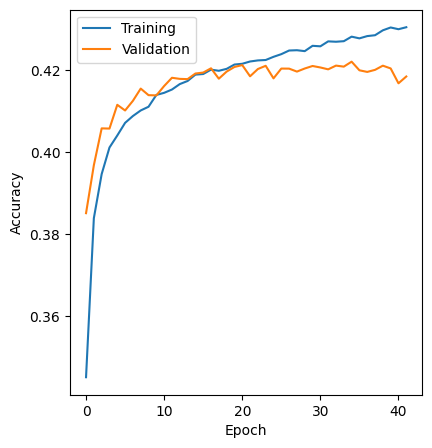

In [31]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('NNaccuracy.png', dpi=300, bbox_inches='tight')
plt.show()

In [32]:

class_names = [str(class_name) for class_name in le.classes_]
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test.argmax(axis=1), y_pred_classes, target_names=class_names))

1991/1991 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
              precision    recall  f1-score   support

           0       0.41      0.14      0.21      4689
           1       0.42      0.52      0.46     15561
           2       0.43      0.64      0.51     17603
           3       0.40      0.26      0.31     10981
           4       0.28      0.00      0.00      2357
           5       0.42      0.45      0.44      7128
           6       0.00      0.00      0.00       554
           7       0.25      0.02      0.03      2031
           8       0.33      0.24      0.28       941
           9       0.00      0.00      0.00       552
          10       0.54      0.35      0.42      1291

    accuracy                           0.42     63688
   macro avg       0.32      0.24      0.24     63688
weighted avg       0.40      0.42      0.39     63688



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1991/1991 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


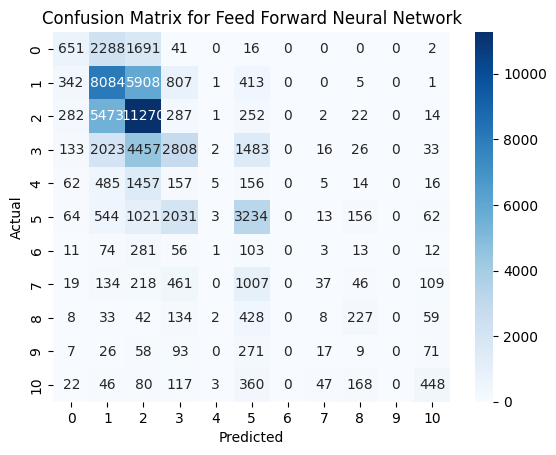

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes, labels=np.arange(num_classes))


sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Feed Forward Neural Network')
plt.show()

## Overall Conclusions and Recommedations

The aim of this research project was to accurately predict the length of stay (LOS) for patients, thereby identifying individuals with extended stays and facilitating strategic care planning. Utilizing machine learning and deep learning methodologies, a feed-forward neural network was developed and evaluated for this purpose.

The results of the neural network model improved in performance over the course of ten epochs. The model achieved an accuracy of 42.02% and a final validation loss of 1.5115. The NN shows potential in identifying patient LOS categories, which can aid hospital staff in optimizing care plans. The relatively simple architecture of the neural network contributes to its interpretability and operational feasibility.
However, it is important to address some key considerations moving forward.

The neural network's computational requirements conversely require data storage solutions to accommodate large datasets, as well as enhancements in computational power to efficiently run the model. These factors should be weighed against the potential benefits of improved care planning and resource allocation.

In summary, while the model's accuracy is not exceptionally high, it represents a meaningful step towards improving patient care through data-driven insights. Further optimization and refinement of the model, coupled with strategic investments in computational resources, will be essential for maximizing its impact and operational viability.
